<a href="https://colab.research.google.com/github/Nisitha529/EN2550_ImageProcessingAndMachineVision/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w) - 1
    return np.sum([x**i*w[M-i] for i in range(M+1)] , axis= 0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w) - 1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(M+1)],axis=0)

In [5]:
def minimum(alpha,x):
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist = np.append(x_hist,x)
        fx_hist = np.append(fx_hist,f(x))
    print('x = ',x,'f(x) = ',f(x))
    return fx_hist,x_hist

0 0 0
x =  -2.779825708653523 f(x) =  -48.23245659837465
1 0 1
x =  2.5338148770255122 f(x) =  -9.083837273119876
2 0 0
x =  -2.779825708653523 f(x) =  -48.23245659837465
3 1 0
x =  0.38672040238744265 f(x) =  8.97070493275584


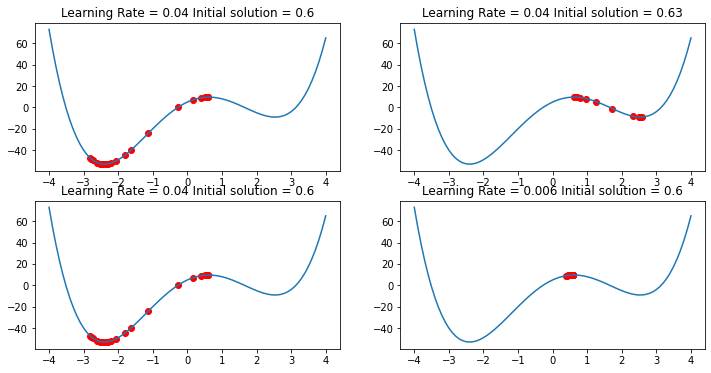

In [6]:
fig,ax = plt.subplots(2,2,figsize = (12,6))

delta , alpha , x = 0.1 , [0.04,0.006] , [0.6,0.63]
x_ =  np.arange(-4,4+delta,delta)
for j in range(4):
    a,b = 0,0
    if j < 2 : a , b = 0 , j % 2
    else: a , b = j%2 , 0
    print(j,a,b)
    fx_hist , x_hist = minimum(alpha[a],x[b])
    ax[j//2][j%2].plot(x_,f(x_))
    ax[j//2][j%2].scatter(x_hist,fx_hist,c = 'r')
    ax[j//2][j%2].set_title("Learning Rate = "+str(alpha[a])+ " Initial solution = "+ str(x[b]))

After oberving above graphs we can say that the initial solution and learning rate can make an impact.


In [7]:
# finding a root close to x0
from scipy.optimise import fsolve
from scipy.optimise import minimize
x0=0.7
root = fsolve(g,x0) #gradient is zero ath this point
print(root)

#Using scipy to find minimum
minimum = minimize(f,x0)
print(minimum)

ModuleNotFoundError: ignored

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib . pyplot as plt
from tensorflow.keras.datasets import cifar10 , mnist

(x_train,y_train) ,(x_test,y_test) = cifar10.load_data( )
# ( x_train , y_train ) , ( x_test , y_te st ) = mnist . load_data ( )
print(" x_train => " , x_train.shape)

Ntr = x_train.shape[ 0]
Nte = x_test.shape[ 0]
Din = 3072 # CIFAR10
 # Din = 784 # MINIST
x_train = x_train [range(Ntr),:]
x_test = x_test [range(Nte),:]
y_train = y_train [range(Ntr) ]
y_test = y_test [range(Nte)]



K = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test= tf.keras.utils.to_categorical(y_test,num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test= np.reshape(x_test,(Nte,Din))
x_train=x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255.
x_test /=255.

170508288/170498071 [==============================] - 3s 0us/step
 x_train =>  (50000, 32, 32, 3)


In [8]:
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [9]:
std =1e-5
w = std*np.random.randn(Din,K)
b = np.zeros(K)
lr = 1e-3
lr_decay=0.1
epochs =11
batch_size=1000
loss_history = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x =x_train[batch_indices]#Extract a batch of 100
        y = y_train[batch_indices]

        #Forward pass
        y_pred = x@w+b
        loss=1./batch_size*np.square(y_pred-y).sum()
        loss_history.append(loss)

        #backward pass
        dy_pred =1./batch_size*2.0*(y_pred-y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w=w-lr*dw
        b = b-lr*db

    if e % 5==0:
        print("Iteration %d / %d: loss %f"%(e,epochs,loss))

    if e % 10==0:
        lr *= lr_decay

Iteration 0 / 11: loss 0.850461
Iteration 5 / 11: loss 0.836771
Iteration 10 / 11: loss 0.834916


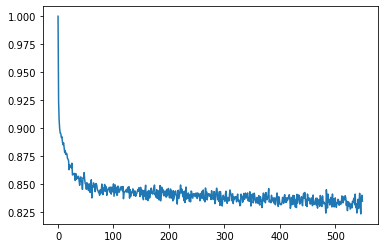

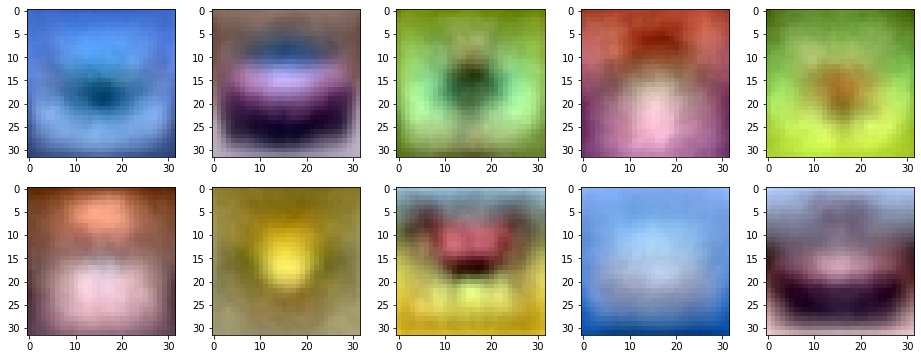

train_acc =  0.33578
test_acc =  0.3352


In [10]:
y_train_pred = x_train.dot(w)+b
y_test_pred = x_test.dot(w)+b
display(y_train,y_test,y_train_pred,y_test_pred,loss_history,w,showim=True)